In [1]:
using Laplacians

In [2]:
include("../src/akpw.jl")

combineMultiG (generic function with 1 method)

In [26]:
a = chimera(100001,1)
@time tree = akpwU(a, x->0.1);
@assert isConnected(tree)
@assert nnz(tree) == 2*size(tree,1)-2
sum(compStretches(tree,a)) / nnz(a)


  0.115393 seconds (230.14 k allocations: 65.554 MB, 9.37% gc time)


7.88758994154737

In [27]:
@time tr = randishPrim(a);
sum(compStretches(tr,a)) / nnz(a)

  0.302891 seconds (400.08 k allocations: 65.709 MB, 3.36% gc time)


13.392382657219574

In [6]:
@time tra = akpw(a)
sum(compStretches(tra,a)) / nnz(a)

  1.538590 seconds (1.22 M allocations: 184.493 MB, 5.46% gc time)


10.114278191034165

In [16]:
@time (comp,tree) = akpwU(a,x->1/(2*log(x)) );
maximum(comp)

  0.002055 seconds (160 allocations: 234.645 KB)


6

## Parameter optimization

In [17]:
st1 = Array(Float64,0)
st2 = Array(Float64,0)
st3 = Array(Float64,0)
stold = Array(Float64,0)

tic()
for i in 1:100
    a = chimera(9003,i)
    

    t1 = akpwU(a)
    push!(st1, sum(compStretches(t1,a)) / nnz(a) )

    
    t2 = akpwU(a,x->(1/(log(x+1))))
    push!(st2, sum(compStretches(t2,a)) / nnz(a) )

    t3 = akpwU(a,x->(1/(2*exp(sqrt(log(x))))))
    push!(st3, sum(compStretches(t3,a)) / nnz(a) )
    
    told = akpw(a)
    push!(stold, sum(compStretches(told,a)) / nnz(a) )

end

toc()

mi = minimum([st1 st2 st3 stold],2)
f = 1.3

stats(v) = [mean(v./mi) median(v./mi) maximum(v./mi) mean(v .== mi) mean(v .> f*mi)]

println(stats(st1))
println(stats(st2))
println(stats(st3))
println(stats(stold))


elapsed time: 21.269472164 seconds
[1.0961555823867704 1.0466196318413168 1.647743032903734 0.23 0.06]
[1.1226533411178823 1.0799355492840592 1.6319599245523357 0.19 0.12]
[1.103145953657218 1.045913656800645 1.7059369677411094 0.26 0.09]
[1.0671200059055066 1.024100904665599 1.5526848258993176 0.41 0.03]


In [45]:

st5 = Array(Float64,0)



tic()
for i in 1:1000
    a = chimera(90001,i)
    


    t5 = akpwU(a,x->(1/(2*log(x))))
    push!(st5, sum(compStretches(t5,a)) / nnz(a) )
    

end

toc()

mi = minimum([st1 st2 st3 st4 stold],2)
f = 1.3

stats(v) = [mean(v./mi) median(v./mi) maximum(v./mi) sum(v .== mi) sum(v .> f*mi)]

println(stats(st5))







elapsed time: 910.560501799 seconds
[1.573597519040565 1.0461617743183793 14.377468072115894 0.0 375.0]


In [12]:
n = 2
exp(sqrt(log(n)))

2.2991847674252783

In [60]:
akpwU(chimera(100),x->0.2)

100x100 sparse matrix with 198 Float64 entries:
	[7  ,   1]  =  1.0
	[26 ,   1]  =  1.0
	[60 ,   1]  =  1.0
	[37 ,   2]  =  1.0
	[47 ,   2]  =  1.0
	[50 ,   2]  =  1.0
	[92 ,   3]  =  1.0
	[31 ,   4]  =  1.0
	[36 ,   4]  =  1.0
	[37 ,   4]  =  1.0
	⋮
	[82 ,  94]  =  1.0
	[34 ,  95]  =  1.0
	[85 ,  96]  =  1.0
	[25 ,  97]  =  1.0
	[52 ,  97]  =  1.0
	[36 ,  98]  =  1.0
	[29 ,  99]  =  1.0
	[88 ,  99]  =  1.0
	[4  , 100]  =  1.0
	[16 , 100]  =  1.0
	[92 , 100]  =  1.0

In [5]:
a = randRegular(10,3)
(ai,aj,av) = findnz(a)
comp = rand(1:5,10)
aic = comp[ai]
ajc = comp[aj]
ac = sparse(aic,ajc,av)

5x5 sparse matrix with 12 Float64 entries:
	[1, 1]  =  2.0
	[2, 1]  =  2.0
	[4, 1]  =  1.0
	[5, 1]  =  4.0
	[1, 2]  =  2.0
	[2, 2]  =  6.0
	[4, 2]  =  2.0
	[5, 2]  =  2.0
	[1, 4]  =  1.0
	[2, 4]  =  2.0
	[1, 5]  =  4.0
	[2, 5]  =  2.0

In [79]:

(i,j,v) = combineMultiG(aic,ajc,av)
println([i j v])

[1.0 1.0 1.0
 1.0 1.0 1.0
 2.0 1.0 1.0
 2.0 1.0 1.0
 2.0 1.0 1.0
 2.0 1.0 1.0
 2.0 1.0 1.0
 3.0 1.0 1.0
 4.0 1.0 1.0
 5.0 1.0 1.0
 5.0 1.0 2.0
 1.0 2.0 1.0
 1.0 2.0 1.0
 1.0 2.0 1.0
 1.0 2.0 1.0
 1.0 2.0 1.0
 5.0 2.0 1.0
 1.0 3.0 1.0
 4.0 3.0 1.0
 5.0 3.0 1.0
 1.0 4.0 1.0
 3.0 4.0 1.0
 5.0 4.0 1.0
 1.0 5.0 1.0
 1.0 5.0 2.0
 2.0 5.0 1.0
 3.0 5.0 1.0
 4.0 5.0 1.0]
[1.0 1.0 2.0
 1.0 2.0 5.0
 1.0 3.0 1.0
 1.0 4.0 1.0
 1.0 5.0 3.0
 2.0 1.0 5.0
 2.0 5.0 1.0
 3.0 1.0 1.0
 3.0 4.0 1.0
 3.0 5.0 1.0
 4.0 1.0 1.0
 4.0 3.0 1.0
 4.0 5.0 1.0
 5.0 1.0 3.0
 5.0 2.0 1.0
 5.0 3.0 1.0
 5.0 4.0 1.0]


In [80]:
ac

5x5 sparse matrix with 17 Float64 entries:
	[1, 1]  =  2.0
	[2, 1]  =  5.0
	[3, 1]  =  1.0
	[4, 1]  =  1.0
	[5, 1]  =  3.0
	[1, 2]  =  5.0
	[5, 2]  =  1.0
	[1, 3]  =  1.0
	[4, 3]  =  1.0
	[5, 3]  =  1.0
	[1, 4]  =  1.0
	[3, 4]  =  1.0
	[5, 4]  =  1.0
	[1, 5]  =  3.0
	[2, 5]  =  1.0
	[3, 5]  =  1.0
	[4, 5]  =  1.0

In [44]:
sum(ajc.==1)

11

In [50]:
println([aic ajc av])

[2.0 1.0 1.0
 5.0 1.0 1.0
 1.0 1.0 1.0
 1.0 2.0 1.0
 1.0 2.0 1.0
 1.0 2.0 1.0
 4.0 3.0 1.0
 5.0 3.0 1.0
 1.0 3.0 1.0
 3.0 4.0 1.0
 5.0 4.0 1.0
 1.0 4.0 1.0
 1.0 5.0 1.0
 1.0 5.0 2.0
 1.0 2.0 1.0
 1.0 2.0 1.0
 5.0 2.0 1.0
 5.0 1.0 2.0
 2.0 1.0 1.0
 1.0 1.0 1.0
 2.0 1.0 1.0
 2.0 1.0 1.0
 3.0 5.0 1.0
 4.0 5.0 1.0
 2.0 5.0 1.0
 2.0 1.0 1.0
 3.0 1.0 1.0
 4.0 1.0 1.0]


In [41]:
sum(g)

30.0

In [42]:
sum(ac)

30.0

In [31]:
size(aic)

(28,)

In [32]:
sum(aic.==1)

6

In [88]:
# question is how to combine.  right now use max of wts, but sum might be reasonable too
function combineMultiG{Ti,Tv}(ai::Array{Ti,1}, aj::Array{Ti,1}, av::Array{Tv,1})

    numnz = length(ai)

    aind = collect(1:numnz)
    
    n = maximum([maximum(ai) maximum(aj)]) 
    
    deg = zeros(Ti, n) 

    ptr = 1
    for k in 1:numnz
        deg[ai[k]] += 1
    end

    I1 = Array(Ti, numnz)
    J1 = Array(Ti, numnz)
    aind1 = Array(Ti, numnz)
    V1 = zeros(Tv, numnz)

    cumdeg = cumsum(deg)
    col = [1;cumdeg+1]

    cumdeg1 = copy(cumdeg)
    
    for i in numnz:-1:1
        ptr = cumdeg1[ai[i]]
        cumdeg1[ai[i]] -= 1
        I1[ptr] = ai[i]
        J1[ptr] = aj[i]
        V1[ptr] = av[i]
        aind1[ptr] = aind[i]
    end


    
    I2 = Array(Ti, numnz)
    J2 = Array(Ti, numnz)
    aind2 = Array(Ti, numnz)
    V2 = Array(Tv, numnz)

    for i in numnz:-1:1
        ptr = cumdeg[J1[i]]
        cumdeg[J1[i]] -= 1
        I2[ptr] = I1[i]
        J2[ptr] = J1[i]
        aind2[ptr] = aind1[i]
        V2[ptr] = V1[i]
    end

    # now, the list is sorted by J, and within that by i
    # so compress it
    
    I3 = Array(Ti, numnz)
    J3 = Array(Ti, numnz)
    aind3 = Array(Ti, numnz)
    V3 = Array(Tv, numnz)
    
    ptr = 0
    i2old = I2[1]
    j2old = J2[1]
    v2 = 0
    ind3 = 0
    for i in 1:numnz
        i2 = I2[i]
        j2 = J2[i]
        
        
        if  (i2 == i2old) && (j2 == j2old)
            if V2[i] > v2
                v2 = V2[i]
                ind3 = aind2[i]
            end
        else 
            
  
            ptr += 1
            I3[ptr] = i2old
            J3[ptr] = j2old
            aind3[ptr] = ind3
            V3[ptr] = v2
            i2old = i2
            j2old = j2
            v2 = V2[i]
        end
    end
    
    ptr += 1
    I3[ptr] = i2old
    J3[ptr] = j2old
    aind3[ptr] = ind3
    V3[ptr] = v2
     
    return sparse(J3[1:ptr], I3[1:ptr], V3[1:ptr],n , n), aind3[1:ptr]

end


combineMultiG (generic function with 1 method)

In [85]:
av = collect(1:28)
println([aic ajc av])

[2 1 1
 5 1 2
 1 1 3
 1 2 4
 1 2 5
 1 2 6
 4 3 7
 5 3 8
 1 3 9
 3 4 10
 5 4 11
 1 4 12
 1 5 13
 1 5 14
 1 2 15
 1 2 16
 5 2 17
 5 1 18
 2 1 19
 1 1 20
 2 1 21
 2 1 22
 3 5 23
 4 5 24
 2 5 25
 2 1 26
 3 1 27
 4 1 28]


In [6]:
a = triu(a,1)
full(a)
(ai,aj,av) = findnz(a)
av = collect(1:length(av))
a = sparse(ai,aj,av,10,10)
a = a + a'
full(a)

10x10 Array{Int64,2}:
  0  0   0  1   0  0   0  7  10   0
  0  0   0  2   0  4   0  8   0   0
  0  0   0  3   0  0   0  0   0  13
  1  2   3  0   0  0   0  0   0   0
  0  0   0  0   0  0   5  0  11  14
  0  4   0  0   0  0   6  9   0   0
  0  0   0  0   5  6   0  0  12   0
  7  8   0  0   0  9   0  0   0   0
 10  0   0  0  11  0  12  0   0   0
  0  0  13  0  14  0   0  0   0   0

In [7]:
aic = comp[ai]
ajc = comp[aj]
println([aic ajc av])

[1 4 1
 2 4 2
 2 4 3
 2 2 4
 1 1 5
 2 1 6
 1 5 7
 2 5 8
 2 5 9
 1 5 10
 1 5 11
 1 5 12
 2 2 13
 1 2 14]


In [21]:
include("../src/akpw.jl")

combineMultiG (generic function with 1 method)

In [23]:
ac, ind = compGraph(a, comp);
(ci,cj,cv) = findnz(ac)
println([ci cj cv ind])

[4 1 1 1
 5 1 7 2
 5 1 10 3
 4 2 2 4
 5 2 8 6
 4 2 3 7
 1 4 1 9
 2 4 2 10
 2 4 3 11
 5 1 11 13
 2 1 14 14
 1 2 6 16
 5 2 9 17
 2 1 6 19
 5 1 12 20
 1 5 7 21
 2 5 8 22
 2 5 9 23
 1 5 10 24
 1 5 11 25
 1 5 12 26
 1 2 14 28]
[2 1 14 14
 4 1 1 1
 5 1 12 20
 1 2 14 28
 4 2 3 7
 5 2 9 17
 1 4 1 9
 2 4 3 11
 1 5 12 26
 2 5 9 23]


In [10]:
x = rand(0:1,5)
find(x)

4-element Array{Int64,1}:
 1
 3
 4
 5

In [190]:
include("../src/akpw.jl")

combineMultiG (generic function with 1 method)

In [168]:
a = chimera(1000,1);

In [193]:
a = wtedChimera(100000,1);
srand(1)
@time tr = akpwish(a);
println(sum(compStretches(tr,a)) / nnz(a))
srand(1)
@time tru = akpwU(a);
println(sum(compStretches(tru,a)) / nnz(a))

  0.995611 seconds (3.52 M allocations: 191.809 MB, 8.10% gc time)
6.133511987721895
  0.158844 seconds (157.69 k allocations: 91.223 MB, 9.37% gc time)
71.19464478392352


In [194]:
@time trold = akpw(a);
println(sum(compStretches(trold,a)) / nnz(a))

  0.932602 seconds (446.70 k allocations: 135.453 MB, 9.01% gc time)
6.835717571697362


In [82]:
sum(abs(tr - tr'))

0.0

In [84]:
nnz(tru)

1998

In [77]:
maximum(a)

2.0

In [78]:
mean(a.nzval)

1.0006671114076051

In [203]:
stnew = Array(Float64,0)
stp = Array(Float64,0)
stold = Array(Float64,0)

timenew = 0
timep = 0
timeold = 0

tic()
for i in 1:1000
    a = wtedChimera(90004,i)
    
    tic()
    tnew = akpwish(a)
    timenew += toq()
    push!(stnew, sum(compStretches(tnew,a)) / nnz(a) )

    tic()
    tp = randishPrim(a)
    timep += toq()
    push!(stp, sum(compStretches(tp,a)) / nnz(a) )    
    
    tic()
    told = akpw(a)
    timeold += toq()
    push!(stold, sum(compStretches(told,a)) / nnz(a) )

end

toc()

mi = minimum([stnew stp stold],2)
f = 1.3

stats(v) = [mean(v./mi) median(v./mi) maximum(v./mi) mean(v .== mi) mean(v .> f*mi)]

println(stats(stnew))
println(stats(stp))

println(stats(stold))

@show timenew
@show timep
@show timeold

elapsed time: 3164.63150996 seconds
[94.64750413734377 1.0000000000000002 93388.69856492314 0.499 0.124]
[1.9374749717201243 1.7853294610925174 15.80845813596916 0.03 0.843]
[3.1300109058863574 1.0 1909.6746914059522 0.518 0.108]
timenew = 704.1928727039991
timep = 305.01380858699986
timeold = 891.7955132220004


891.7955132220004

In [204]:
findmax(stnew ./ mi)

(93388.69856492314,180)

In [205]:
a = wtedChimera(90004,180);
tnew = akpwish(a)
sum(compStretches(tnew,a)) / nnz(a)

318177.85007300257

In [207]:
tnew[1,:]

1x90004 sparse matrix with 1 Float64 entries:
	[1    , 87301]  =  10.7844

In [208]:
a[1,:]

1x90004 sparse matrix with 3 Float64 entries:
	[1    , 35266]  =  8.36539
	[1    , 43524]  =  10.5375
	[1    , 87301]  =  10.7844

In [209]:
told = akpw(a);
sum(compStretches(told,a)) / nnz(a)

3.4070273487300784

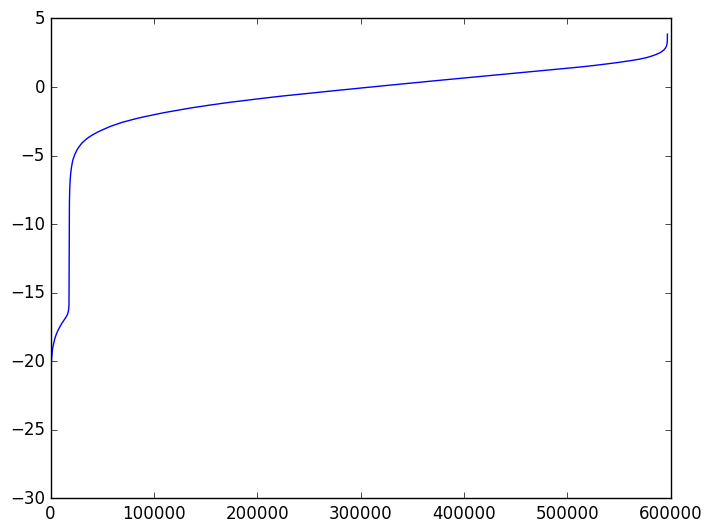

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322237cd0>

In [213]:
using PyPlot
plot(log(sort(a.nzval)))

In [265]:
stnew = Array(Float64,0)
stp = Array(Float64,0)
stold = Array(Float64,0)

timenew = 0
timep = 0
timeold = 0

tic()
for i in 1:10000
    a = wtedChimera(100,i)
    
    tic()
    tnew = akpwish(a)
    timenew += toq()
    push!(stnew, sum(compStretches(tnew,a)) / nnz(a) )

    
    tic()
    tp = randishPrim(a)
    timep += toq()
    push!(stp, sum(compStretches(tp,a)) / nnz(a) )    
    
    
    tic()
    told = akpw(a)
    timeold += toq()
    push!(stold, sum(compStretches(told,a)) / nnz(a) )

end

toc()

mi = minimum([stnew stp stold],2)
f = 1.3

stats(v) = [mean(v./mi) median(v./mi) maximum(v./mi) mean(v .== mi) mean(v .> f*mi)]

println(stats(stnew))
println(stats(stp))

println(stats(stold))

@show timenew
#@show timep
@show timeold

elapsed time: 27.71791812 seconds
[1.0329578609017473 1.0 3.044104883278004 0.7095 0.0197]
[1.6135367739645807 1.469106526640427 28.08383656108187 0.0498 0.6663]
[1.2163115202866204 1.1025249769393954 19.70007674391376 0.287 0.2417]
timenew = 5.759704107000006
timeold = 2.818882684999991


2.818882684999991

In [228]:
findmax(stnew./stold)

(1.76998356630378e6,8785)

In [270]:
function complsst(sz::Int, nruns::Int)
stnew = Array(Float64,0)
stp = Array(Float64,0)
stold = Array(Float64,0)

timenew = 0
timep = 0
timeold = 0

tic()
    for i in 1:nruns
        a = wtedChimera(sz,i)
    
    tic()
    tnew = akpwish(a)
    timenew += toq()
    push!(stnew, sum(compStretches(tnew,a)) / nnz(a) )

    
    tic()
    tp = randishPrim(a)
    timep += toq()
    push!(stp, sum(compStretches(tp,a)) / nnz(a) )    
    
    
    tic()
    told = akpw(a)
    timeold += toq()
    push!(stold, sum(compStretches(told,a)) / nnz(a) )

end

toc()

mi = minimum([stnew stp stold],2)
f = 1.3

stats(v) = [mean(v./mi) median(v./mi) maximum(v./mi) mean(v .== mi) mean(v .> f*mi)]

println(stats(stnew))
println(stats(stp))

println(stats(stold))

@show timenew
@show timep
@show timeold
    
end



complsst (generic function with 2 methods)

In [271]:
complsst(1000,1001)

elapsed time: 17.150495434 seconds
[1.0418868935278642 1.0 2.063921384429326 0.6423576423576424 0.027972027972027972]
[1.8091368111270818 1.6859720039258068 17.965155972271987 0.026973026973026972 0.7962037962037962]
[1.63454126490793 1.0650356796731735 180.1090874544127 0.36663336663336665 0.17782217782217782]
timenew = 4.540195051999999
timep = 1.138203373000002
timeold = 2.6787831649999965


2.6787831649999965

In [272]:
complsst(10010,101)

elapsed time: 19.092920961 seconds
[1.0416746135444168 1.0 2.0882087764326913 0.693069306930693 0.039603960396039604]
[1.8542378843254879 1.8077424267467397 3.5754658615660317 0.0 0.8514851485148515]
[1.288608045611944 1.0679218834395716 11.214703437036851 0.3069306930693069 0.18811881188118812]
timenew = 5.405975421999999
timep = 1.6513358239999993
timeold = 3.728321181000001


3.728321181000001

In [274]:
Profile.clear()

In [3]:
for i in 1:10
    a = wtedChimera(10010,i)
    @profile tr = akpwish(a)
end


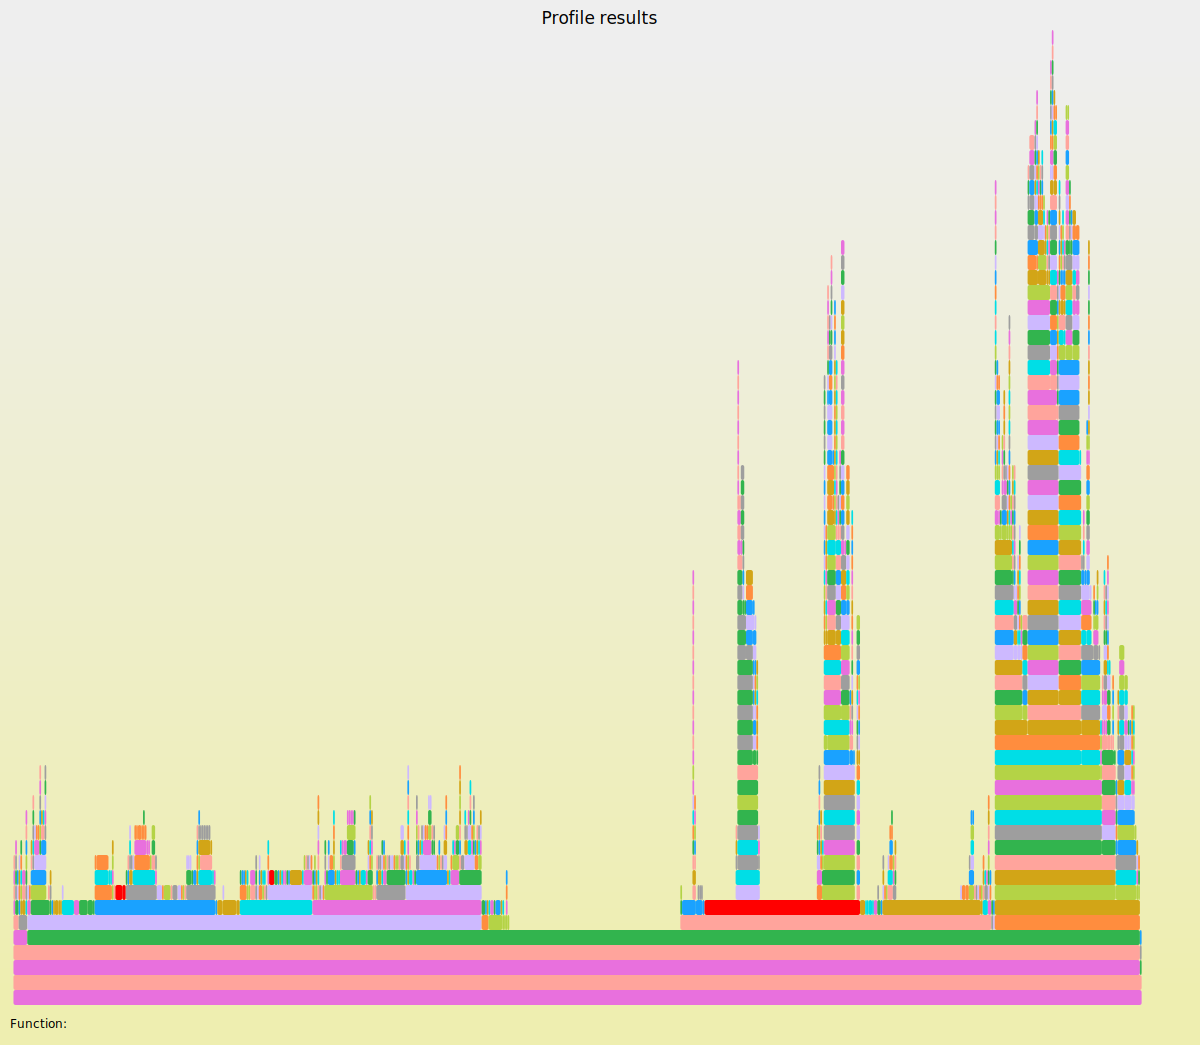

In [5]:
using PyPlot
pygui(true)
ProfileView.view()

In [ ]:
1+2

In [261]:
include("../src/akpw.jl")

tnew = akpwish(a)
sum(compStretches(tnew,a)) / nnz(a)

1.147081628256273